<a href="https://colab.research.google.com/github/sadewa0909/PCVK_Genap_2021/blob/main/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


1. Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab terhubung dengan Github Anda, buat notebook baru dan beri nama “Week10.ipynb”. Kemudian import folder yang ada di Drive Anda dengan cara sebagai berikutl

In [14]:

from google.colab import drive

drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive



2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum minggu ke-6 berikut.

In [15]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt


3. Buat Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV) secara manual sesuai dengan deskripsi dari grafik yang ditunjukkan di atas.

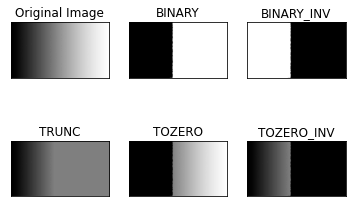

NameError: ignored

In [16]:
#Dengan Library
img = cv.imread('/content/drive/MyDrive/PCVK/Images/gradient.jpg',0)
ret,thresh1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(img,127,255,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(img,127,255,cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(img,127,255,cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(img,127,255,cv.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

#Tanpa Library
img = cv2.imread(filename) 
thresh1 = cv2.imread(filename) 
thresh2 = cv2.imread(filename) 
thresh3 = cv2.imread(filename) 
thresh4 = cv2.imread(filename) 
thresh5 = cv2.imread(filename) 
thresh = 127    #nilai Threshold yang ditentukan

#1. Original Image
thresh1[img>thresh] = 255     
thresh1[img<=thresh] = 0

#2. Binary threshold inverse 
thresh2 = 255 - thresh1            
#3. Threshold Truncate 
thresh3[img>thresh] = thresh        
#4. Threshold Tozero 
thresh4[img<=thresh] = 0            
#5. Threshold Tozero Inverse 
thresh5[img>thresh] = 0        
     
titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV'] 
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]


plt.figure(figsize = (15,5)) 
for i in range(len(images)):
  plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest') 
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([]) 
plt.show()


4. Buat Otsu Thresholding tanpa menggunakan Library. Tampilkan juga nilai threshold saat anda gunakan Otsu’s, seperti terlihat pada gambar hasil berikut. (gunakan image lena_gs_lc2.jpg agar benar2 terlihat beda antara hasil otsu’s dengan global threshold biasa)

In [12]:
filename = ('/content/drive/MyDrive/PCVK/Images/lena_gs_lc2.jpg')
img = cv2.imread(filename,0) 
blur = cv2. GaussianBlur (img, (5,5),0)

hist = cv2.calcHist([blur],[0],None,[256], [0,256]) 
hist_norm = hist.ravel()/hist.max() 
Q = hist_norm.cumsum() 
bins = np.arange (256) 
wb = 0 
sumb = 0 
varmax = 0 
fn_min = np.inf 
thresh = -1 
for i in range(0,255):
  wb += hist[i] 
  wf = (img.shape[0]*img.shape[1]) - wb 
  sumb += (i*hist[i]) 
  mb = sumb / wb 
  mf = (sumb - sumb)/wf 
  betweenvar = wb * wf * (mb - mf) * (mb - mf) 
  if (betweenvar>varmax):
    varmax = betweenvar
    thresh = i 
x = ("Otsu's Thresholding (v = ")+str(thresh)+")" 
ret, th1 = cv2.threshold(blur, 127, 255, cv2.THRESH_BINARY)
ret, th2 = cv2.threshold (blur, thresh, 255, cv2. THRESH_BINARY)

titles = ['Citra Asli', 'Global Thresholding (v = 127)', x] 
citra3 = [blur, th1, th2]

plt. figure(figsize = (20,15)) 
for i in range(len(citra3)):
    plt. subplot(1,3,i+1),plt.imshow(citra3[i], 'gray') 
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([]) 
plt.show()

NameError: ignored


5. Buat histogram dari citra tersegmentasi, Histogram hanya pada foreground image saja. Gunakan image Lily atau Leaves yang sudah disediakan di folder images. Petunjuk:
                a. anda dapat gunakan cv.calcHist untuk menampilkan

                b. Buka link berikut https://opencvtutorial.readthedocs.io/en/latest/histogram/histogram.html

                c. Dari link tersebut perhatikan bahwa cv.calcHist memiliki salah satu parameter yaitu mask. Jika diset None, maka keseluruhan image akan dihitung histogramnya. Jika kita tentukan mask, maka hanya bagian image yang dimasking warna putih yang akan dihitung histogramnya (dari contoh dibawah dinamakan dengan Citra Segment).  

In [17]:
filename = ('/content/drive/MyDrive/PCVK/Images/lily.jpg')

img = cv.imread(filename) 
img = cv.cvtColor(img,cv2.COLOR_BGR2RGB)
img_gray = cv.cvtColor(img,cv2.COLOR_BGR2GRAY)

ret3,mask = cv.threshold(img_gray,200,255,cv2.THRESH_BINARY_INV)

plt.figure(figsize = (10,10)) 
plt.subplot(2,2,1),plt.imshow(img) 
plt.title('Citra Asli') 
plt.subplot(2,2,2),plt.imshow(mask, 'gray') 
plt.title('Citra Segment') 
color = ('r','g','b') 
for i,col in enumerate(color):
    hist0 = cv.calcHist([img],[i],None,[256],[0,256]) 
    plt.subplot(2,2,3),plt.plot(hist0,color = col) 
    plt.title('Histogram dari keseluruhan citra') 
    hist1 = cv.calcHist([img],[i],mask,[256],[0,256]) 
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram dari keseluruhan citra') 
    hist1 = cv.calcHist([img],[i],mask,[256],[0,256]) 
    plt.subplot(2,2,4),plt.plot(hist1,color = col) 
    plt.title('Histogram hanya pada FG objek saja')
    plt.xlim([0,256]) 
plt.show()

NameError: ignored